In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df=pd.read_excel('Milk_Data_Complete.xlsx')
df.head()


,Conc.(mg/ml),Type of Milk,Foamability(ml),Foam height(mm),RMI 30(ml),t(s),Height(mm),Temperature(°C),Adulterant
0,0,Fresh,48.30,38.40,44.4,33.00,20.10,26,SDS
1,0,Fresh,52.50,41.50,50.5,67.80,20.20,26,SDS
2,0,Fresh,49.70,39.60,25.4,32.80,20.20,26,SDS
3,0,Fresh,50.17,39.83,40.1,44.53,20.17,26,SDS
4,10,Fresh,51.60,41.10,49.6,41.10,20.10,26,SDS


In [3]:
df.tail()

,Conc.(mg/ml),Type of Milk,Foamability(ml),Foam height(mm),RMI 30(ml),t(s),Height(mm),Temperature(°C),Adulterant
413,70,Raw,39.57,31.5,37.87,73.97,20.13,60,Tween80
414,150,Raw,42.30,33.7,41.50,615.10,20.20,60,Tween80
415,150,Raw,45.60,36.3,44.50,95.10,20.30,60,Tween80
416,150,Raw,41.70,33.2,39.10,67.70,20.10,60,Tween80
417,150,Raw,43.20,34.4,41.70,259.30,20.20,60,Tween80


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Conc.(mg/ml)     418 non-null    int64  
 1   Type of Milk     418 non-null    object 
 2   Foamability(ml)  418 non-null    float64
 3   Foam height(mm)  418 non-null    float64
 4   RMI 30(ml)       418 non-null    float64
 5   t(s)             418 non-null    float64
 6   Height(mm)       418 non-null    float64
 7   Temperature(°C)  418 non-null    int64  
 8   Adulterant       418 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 29.5+ KB


In [5]:
df.describe()

,Conc.(mg/ml),Foamability(ml),Foam height(mm),RMI 30(ml),t(s),Height(mm),Temperature(°C)
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,57.248804,64.430407,51.234282,59.937057,193.149641,20.174187,31.502392
std,59.778490,29.678573,23.568136,29.573206,215.161841,0.526077,20.680538
min,0.000000,22.900000,18.200000,22.900000,14.000000,19.100000,10.000000
25%,2.500000,35.200000,28.000000,31.447500,73.150000,20.100000,10.000000
50%,10.000000,66.575000,52.975000,57.715000,110.515000,20.130000,26.000000
75%,70.000000,88.800000,70.650000,86.175000,179.950000,20.200000,60.000000
max,150.000000,126.100000,100.400000,128.700000,899.200000,30.100000,60.000000


In [6]:
df.columns


Index(['Conc.(mg/ml)', 'Type of Milk', 'Foamability(ml)', 'Foam height(mm)',
       'RMI 30(ml)', 't(s)', 'Height(mm)', 'Temperature(°C)', 'Adulterant'],
      dtype='object')

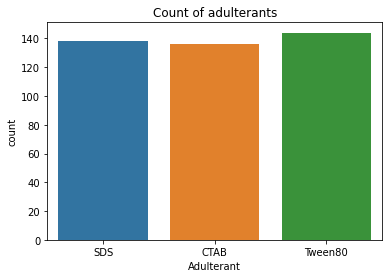

<Figure size 432x576 with 0 Axes>

In [7]:
#count of adulterants
sns.countplot(x='Adulterant',data=df)
plt.title('Count of adulterants')
plt.figure(figsize=(6,8))
plt.show()

<ipython-input-8-c0ca4decefb6>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)


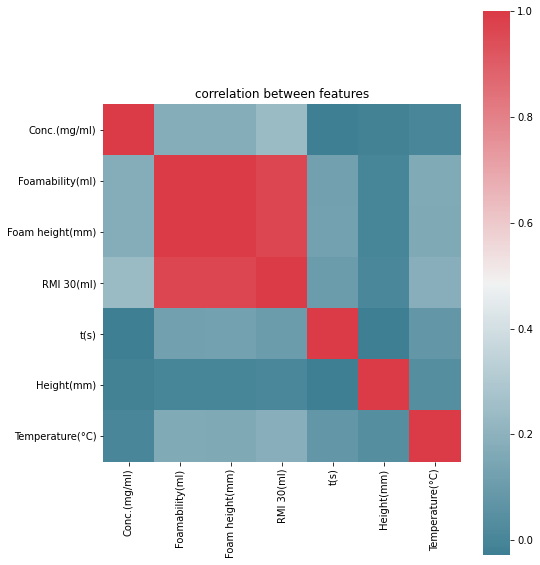

In [8]:
#correlation between features
corr=df.corr(method='pearson')
f,ax=plt.subplots(figsize=(8,10))
plt.title('correlation between features')
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)
plt.show()


In [9]:
#Checking whether there are outliers using boxplots


<AxesSubplot:xlabel='Adulterant', ylabel='Foamability(ml)'>

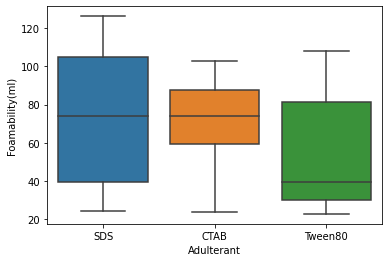

In [10]:
#foamability
sns.boxplot(x='Adulterant',y='Foamability(ml)',data=df)


<AxesSubplot:xlabel='Adulterant', ylabel='Foam height(mm)'>

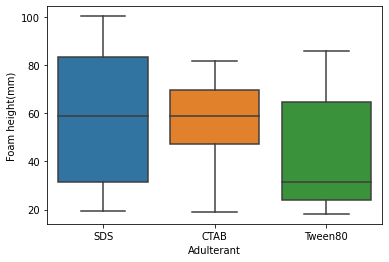

In [11]:
#foam height
sns.boxplot(x='Adulterant',y='Foam height(mm)',data=df)


<AxesSubplot:xlabel='Adulterant', ylabel='RMI 30(ml)'>

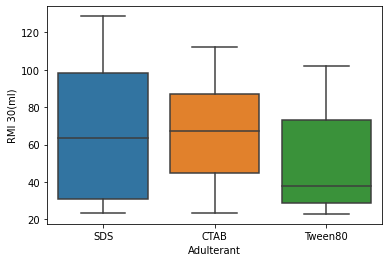

In [12]:
#foam stability
sns.boxplot(x='Adulterant',y='RMI 30(ml)',data=df)

<AxesSubplot:xlabel='Adulterant', ylabel='t(s)'>

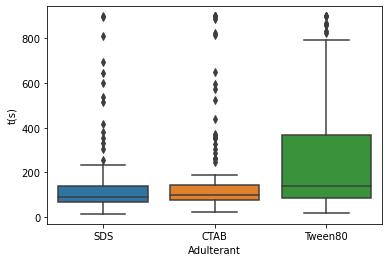

In [13]:
#t(s)
sns.boxplot(x='Adulterant',y='t(s)',data=df)

<AxesSubplot:xlabel='Adulterant', ylabel='Height(mm)'>

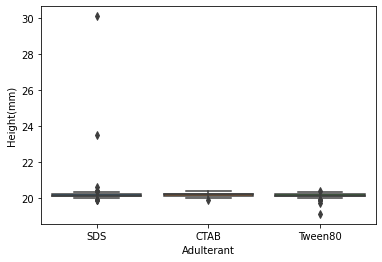

In [14]:
#height
sns.boxplot(x='Adulterant',y='Height(mm)',data=df)

In [15]:
#replacing the categorical feature 'type of milk' using dummy variables
df=pd.get_dummies(df,columns=['Type of Milk'])


In [16]:
#create a copy of the data to work with
new_data=df.copy()
#independent features
X=new_data.drop('Adulterant',axis=1)
#dependent feature
y=new_data['Adulterant']
X.head()

,Conc.(mg/ml),Foamability(ml),Foam height(mm),RMI 30(ml),t(s),Height(mm),Temperature(°C),Type of Milk_Fresh,Type of Milk_Raw,Type of Milk_Toned
0,0,48.30,38.40,44.4,33.00,20.10,26,1,0,0
1,0,52.50,41.50,50.5,67.80,20.20,26,1,0,0
2,0,49.70,39.60,25.4,32.80,20.20,26,1,0,0
3,0,50.17,39.83,40.1,44.53,20.17,26,1,0,0
4,10,51.60,41.10,49.6,41.10,20.10,26,1,0,0


In [17]:
y[:20]

0     SDS
1     SDS
2     SDS
3     SDS
4     SDS
5     SDS
6     SDS
7     SDS
8     SDS
9     SDS
10    SDS
11    SDS
12    SDS
13    SDS
14    SDS
15    SDS
16    SDS
17    SDS
18    SDS
19    SDS
Name: Adulterant, dtype: object

In [18]:
#replacing categorical y with label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [74]:
from sklearn.preprocessing import label_binarize
y=label_binarize(y,classes=[0,1,2])
n_classes=y.shape[1]

In [76]:
#splitting training and test data
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [77]:
#importing Random Forest
from sklearn.ensemble import RandomForestClassifier




In [81]:
#applying GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_estimators':[10,50,100],
    'max_depth':[100,150,200],
    'bootstrap':[True],
    'max_features':[2,3]
}
rf_2=RandomForestClassifier()
#Instantiating the grid search model
grid_search=GridSearchCV(estimator=rf_2,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)


In [82]:
#fitting the grid search to the data and finding out the best parameters
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'bootstrap': True, 'max_depth': 150, 'max_features': 2, 'n_estimators': 100}

In [91]:
#importing other required libraries
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp






In [90]:
classifier1=OneVsRestClassifier(LogisticRegression(C=10,penalty='l2',solver='lbfgs'))
y_score1=classifier1.fit(X_train,y_train).decision_function(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [95]:
#compute roc-auc for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

<ipython-input-99-956df2006f5b>:5: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr+=interp(all_fpr, fpr[i], tpr[i])


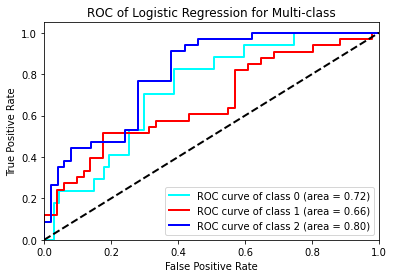

In [99]:
import itertools
all_fpr=np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr=np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr+=interp(all_fpr, fpr[i], tpr[i])
#avg and compute AUC
mean_tpr/=n_classes
#plot all classes
colors = itertools.cycle(['aqua', 'red', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Logistic Regression for Multi-class')
plt.legend(loc="lower right")
plt.show()



In [102]:
classifier2=OneVsRestClassifier(svm.SVC(C=10,kernel='rbf',gamma='scale',probability=True))
y_score2=classifier2.fit(X_train,y_train).decision_function(X_test)


In [103]:
#compute roc-auc for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


<ipython-input-105-c55bf35e9375>:5: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr+=interp(all_fpr, fpr[i], tpr[i])


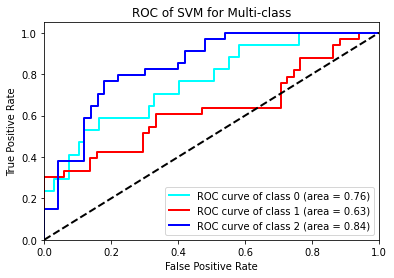

In [105]:
#plot multiclass curve
all_fpr=np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr=np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr+=interp(all_fpr, fpr[i], tpr[i])
#avg and compute AUC
mean_tpr/=n_classes
#plot all classes
colors = itertools.cycle(['aqua', 'red', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of SVM for Multi-class')
plt.legend(loc="lower right")
plt.show()


In [120]:
classifier3=OneVsRestClassifier(GaussianNB())
y_score3=classifier3.fit(X_train,y_train).predict_proba(X_test)


In [121]:
#compute roc-auc for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score3[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


<ipython-input-123-014114c2a858>:5: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr+=interp(all_fpr, fpr[i], tpr[i])


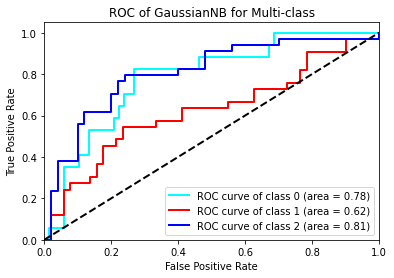

In [123]:
#plot multiclass curve
all_fpr=np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr=np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr+=interp(all_fpr, fpr[i], tpr[i])
#avg and compute AUC
mean_tpr/=n_classes
#plot all classes
colors = itertools.cycle(['aqua', 'red', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of GaussianNB for Multi-class')
plt.legend(loc="lower right")
plt.show()

In [125]:
classifier4=OneVsRestClassifier(RandomForestClassifier(random_state=42,max_depth=150,n_estimators=100,max_features=2,bootstrap=True))
y_score4=classifier4.fit(X_train,y_train).predict_proba(X_test)


In [128]:
#compute roc-auc for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score4[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


<ipython-input-129-10fd3243e446>:5: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr+=interp(all_fpr, fpr[i], tpr[i])


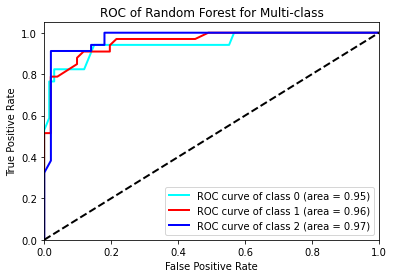

In [129]:
#plot multiclass curve
all_fpr=np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr=np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr+=interp(all_fpr, fpr[i], tpr[i])
#avg and compute AUC
mean_tpr/=n_classes
#plot all classes
colors = itertools.cycle(['aqua', 'red', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Random Forest for Multi-class')
plt.legend(loc="lower right")
plt.show()